# Verify dataset generated by rmpe_dataset_transformer

In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import cv2
import util
import matplotlib
import pylab as plt
import numpy as np
import h5py

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
h5 = h5py.File("../dataset/val_generated_dataset.h5", 'r')
key = "0000011"
dt = h5["label"][key]
heat_result = np.reshape(dt, (57, 46,46))
heat_result.shape

IOError: Unable to open file (Unable to open file: name = '../dataset/val_generated_dataset.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [46]:
dta = h5["data"][key]
dta_img = np.reshape(dta, (3, 368,368))
dta_img.shape

(3, 368, 368)

In [47]:
mask = h5["mask"][key]
mask_img = np.reshape(mask, (1, 46,46))
mask_img.shape

(1, 46, 46)

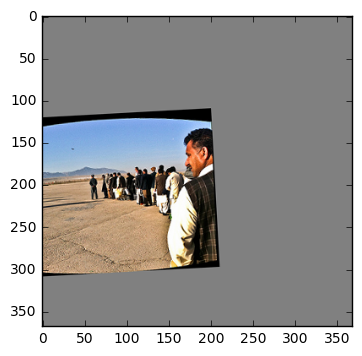

In [48]:
dta_img = np.transpose(dta_img, (1, 2, 0))
plt.imshow(dta_img[:,:,[2,1,0]])

0.0


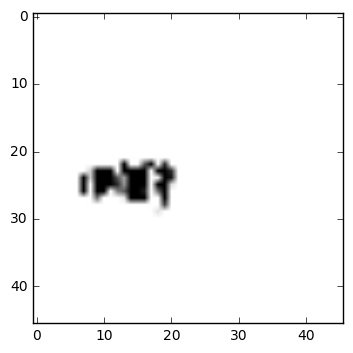

In [49]:
mask = np.transpose(mask_img, (1, 2, 0))
print(np.min(mask))
plt.imshow(mask[:,:, 0] * 255, cmap='gray')

In [50]:
scale = 1
imageToTest = cv2.resize(dta_img, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
imageToTest_padded, pad = util.padRightDownCorner(imageToTest, 8, 128)

heatmap = cv2.resize(heat_result[38,:,:], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3]]
heatmap = cv2.resize(heatmap, (dta_img.shape[0], dta_img.shape[1]), interpolation=cv2.INTER_CUBIC)

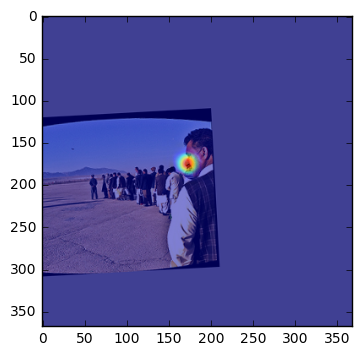

In [51]:
plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

# Verify data generator

In [52]:
from ds_iterator import DataIterator
di = DataIterator("../dataset/val_generated_dataset.h5", data_shape=(3, 368, 368),
                  mask_shape=(1, 46, 46),
                  label_shape=(57, 46, 46),
                  vec_num=38, heat_num=19, batch_size=10, shuffle=True)


x,y = di.next()
x,y = di.next()
x,y = di.next()

In [53]:
y[1].shape

(10, 46, 46, 19)

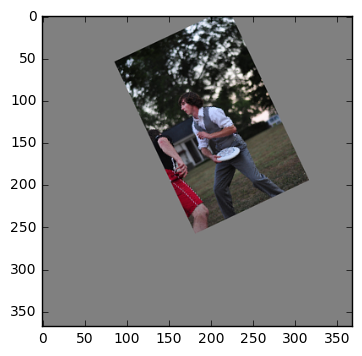

In [56]:
batch_index = 0
body_part = 0

dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

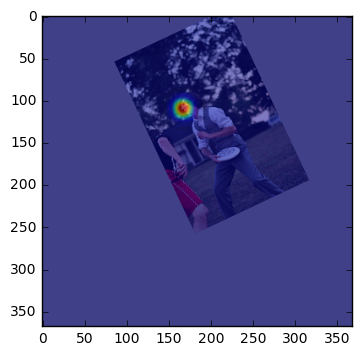

In [57]:
scale = 1
imageToTest = cv2.resize(dta_img, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
imageToTest_padded, pad = util.padRightDownCorner(imageToTest, 8, 128)

heatmap = cv2.resize(y[1][batch_index, :, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3]]
heatmap = cv2.resize(heatmap, (dta_img.shape[0], dta_img.shape[1]), interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

# Verify data generator client

In [4]:
from ds_generator_client import DataGeneratorClient
client = DataGeneratorClient(port=5555, host="localhost", hwm=160, batch_size=10)
client.restart()
batch_index = 0

In [5]:
train_di = client.gen()

In [7]:
x,y = train_di.next()

In [14]:
len(y[0])

10

In [4]:
x,y = next(client.gen())

In [5]:
print(x[0].shape)
print(x[1].shape)
print(x[2].shape)

print(y[0].shape)
print(y[1].shape)
print(y[2].shape)
print(y[3].shape)
print(y[4].shape)
print(y[5].shape)
print(y[6].shape)
print(y[7].shape)
print(y[8].shape)
print(y[9].shape)
print(y[10].shape)
print(y[11].shape)

(1, 368, 368, 3)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)
(1, 46, 46, 38)
(1, 46, 46, 19)


## Show orig image

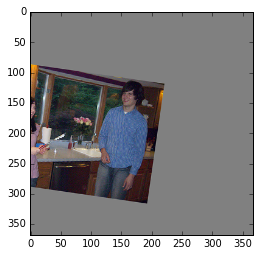

In [30]:
dta_img = x[0][4,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

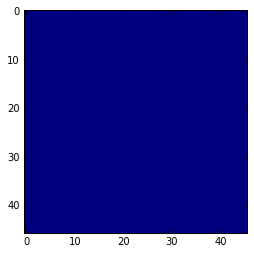

In [46]:
hm_img = x[2][7,:,:,:]
tmp = np.sum(hm_img,axis=2)
plt.imshow(tmp)

In [47]:
hm_img

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

# Show orig img + mask

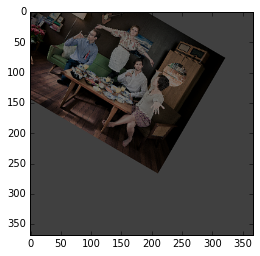

In [7]:
dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

mask_img = x[1][batch_index,:,:,:]
mask_img = cv2.resize(mask_img[:,:, 0], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(mask_img * 255, cmap='gray', alpha=.5)

# Show heatmap

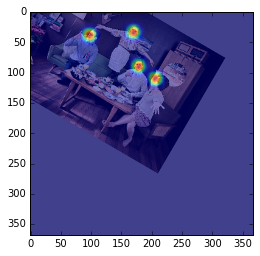

In [8]:
batch_index = 0
body_part = 0

dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

heatmap = cv2.resize(y[1][batch_index, :, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

## Show PAF

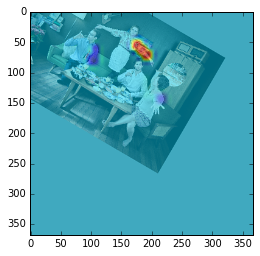

In [9]:
batch_index = 0
paf_idx = 22

dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

paf = cv2.resize(y[0][batch_index, :, :, paf_idx], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(paf[:,:], alpha=.5)

In [3]:
client.stop()